# Grocery Recommendation System

## Dataset information
This data was retrieved from Kaggle and was provided by Instacart for a market basket analysis

The data is divided into 6 files:

- Aisles.csv: 134 Unique aisle numbers and descriptions
- Departments.csv: 21 Unique department numbers and descriptions
- Products.csv: 49,688 Unique product ids, with description, aisle id, and department id
- Orders.csv: 3,421,083 Unique order id, with user id, order number, order_dow, order_hour_of_day, days_since_prior_order, and eval_set indicating if the order is in train, prior, or test
- Order_productstrain.csv: Order id, product id, add to cart order, and reorder indicator
- Order_productsprior.csv: Order id, product id, add to cart order, and reorder indicator



# Import needed Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Datasets


In [3]:
aisles = pd.read_csv("drive/MyDrive/int247_project/datasets/aisles.csv")
departments = pd.read_csv("drive/MyDrive/int247_project/datasets/departments.csv")
order_products_prior = pd.read_csv("drive/MyDrive/int247_project/datasets/order_products__prior.csv")
order_products_train = pd.read_csv("drive/MyDrive/int247_project/datasets/order_products__train.csv")
orders = pd.read_csv("drive/MyDrive/int247_project/datasets/orders.csv")
products = pd.read_csv("drive/MyDrive/int247_project/datasets/products.csv")

# Check if data have NaN(s)

In [4]:
# checking NaN(s) for alise datatset
aisles.isna()

,aisle_id,aisle
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
129,False,False
130,False,False
131,False,False
132,False,False


In [5]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
# checking NaN(s) for departments datatset
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [7]:
# checking NaN(s) for products datatset
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [8]:
# checking NaN(s) for orders datatset
orders.isna().sum()
# days_since_prior_order have 206209 NaN(s)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [9]:
# checking count for days_since_prior_order in orders
orders.days_since_prior_order.value_counts()
# no one > 30

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [10]:
# check orders dataframe
orders.head(20)
# order_id : always unique
# user_id : according to user
# order_number : the number of order ordered by the user
# according to dataset it looks like order '1' will have a NaN in days_since_prior_order since it is their first order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [11]:
# checking NaN(s) for order_products_train datatset
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [12]:
# checking NaN(s) for order_products_prior datatset
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

# Analysing Data for each Dataset


### Analysing Products 

In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
len(products)

49688

In [15]:
products.aisle_id.nunique()

134

In [16]:
products.department_id.nunique()

21

In [17]:
# checking number of products in each department with its alise by mergining datasets
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


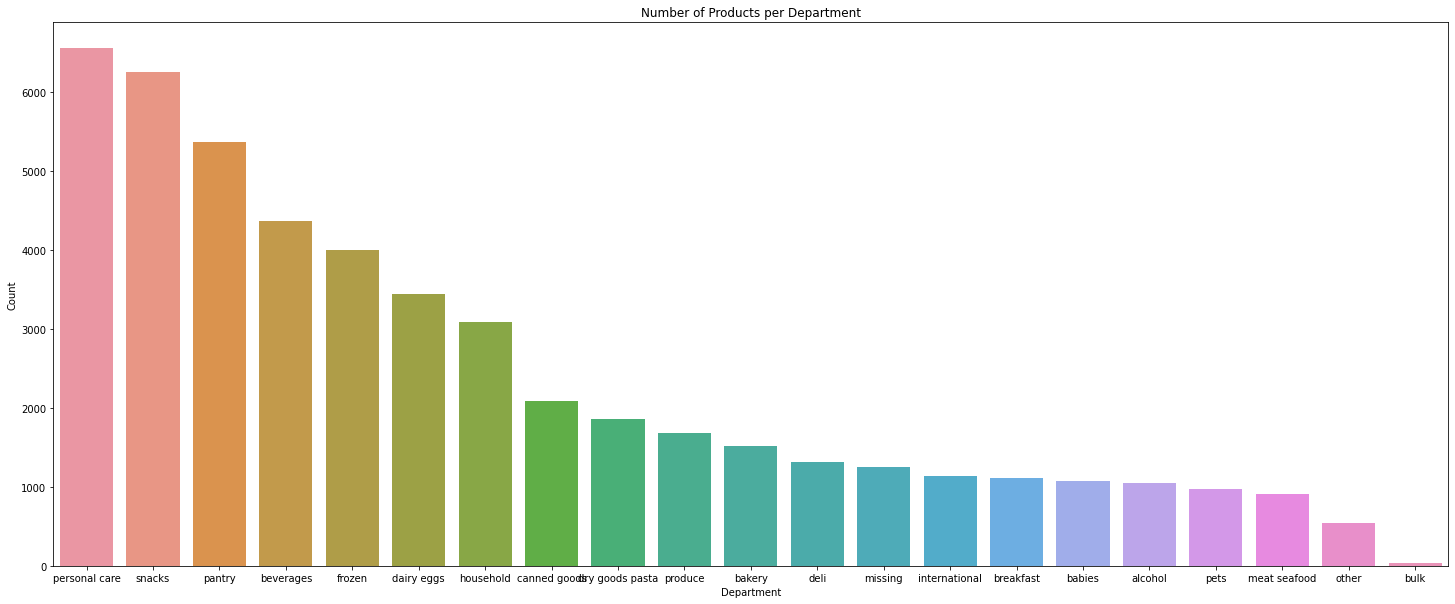

In [18]:
# visualizing for department wrt product

plt.figure(figsize = (25,10))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.ylabel('Count')
plt.xlabel('Department')
plt.savefig('images/products_by_department.png');

# here we can see there is one missing department also which we don't know, so we have to deal with it

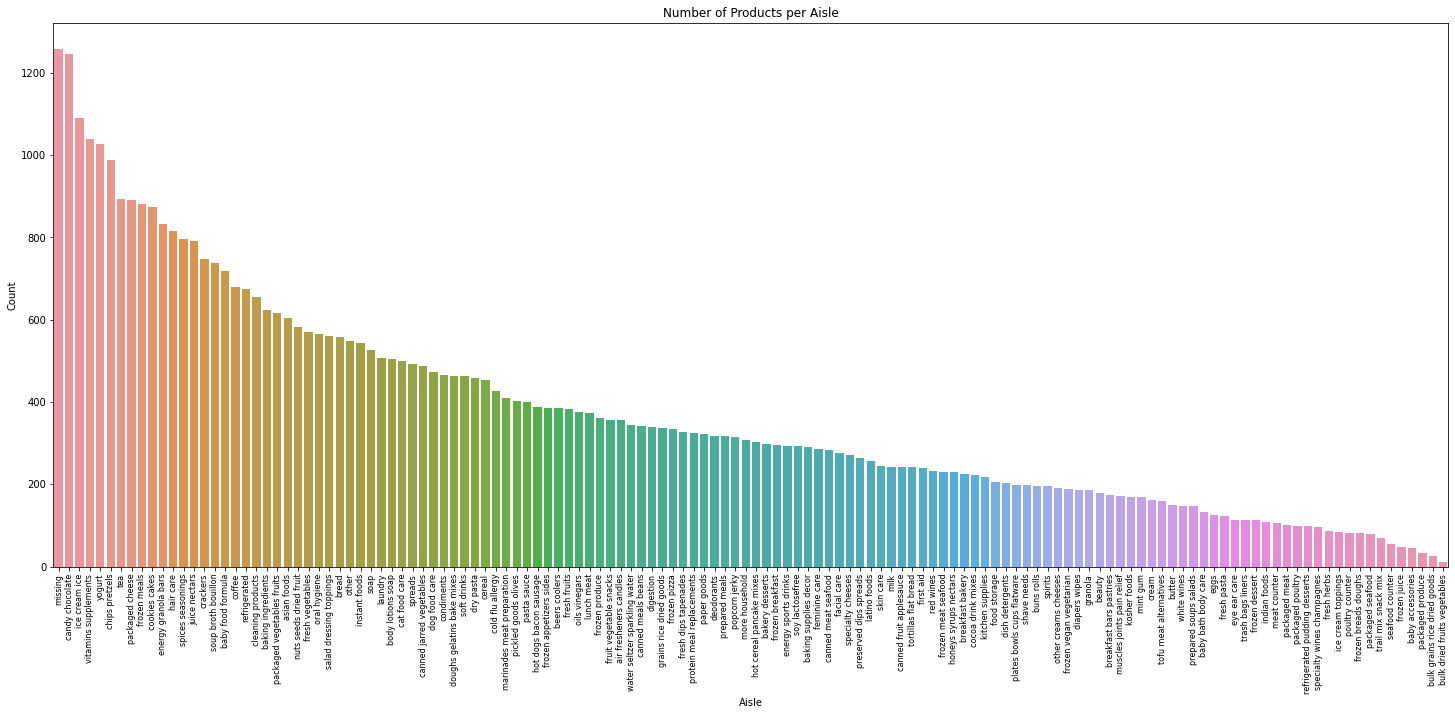

In [19]:
# visualizing for aisle wrt product
plt.figure(figsize = (25,10))
sns.countplot(x='aisle', data= products_desc, order = products_desc.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.savefig('images/products_by_aisle.png');

# here we can see that missing is very popular so we have to resolve this

In [20]:
# checking missing aisles
products_desc[products_desc['aisle']=='missing']

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [21]:
# checking depatmnt
products_desc[products_desc['department']=='missing']

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [22]:
# checking random value for department
products_desc[products_desc['department']=='snacks']

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips pretzels,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks
49665,49666,Ginger Snaps Snacking Cookies,61,19,cookies cakes,snacks
49670,49671,Milk Chocolate Drops,45,19,candy chocolate,snacks


In [23]:
pickle.dump(products_desc, open("pickle files/products_desc.p", "wb"))

## Analyzing Orders

In [24]:
orders.shape

(3421083, 7)

In [25]:
# min and max orders
print(orders.min())
print(orders.max())

order_id                      1
user_id                       1
eval_set                  prior
order_number                  1
order_dow                     0
order_hour_of_day             0
days_since_prior_order      0.0
dtype: object
order_id                  3421083
user_id                    206209
eval_set                    train
order_number                  100
order_dow                       6
order_hour_of_day              23
days_since_prior_order       30.0
dtype: object


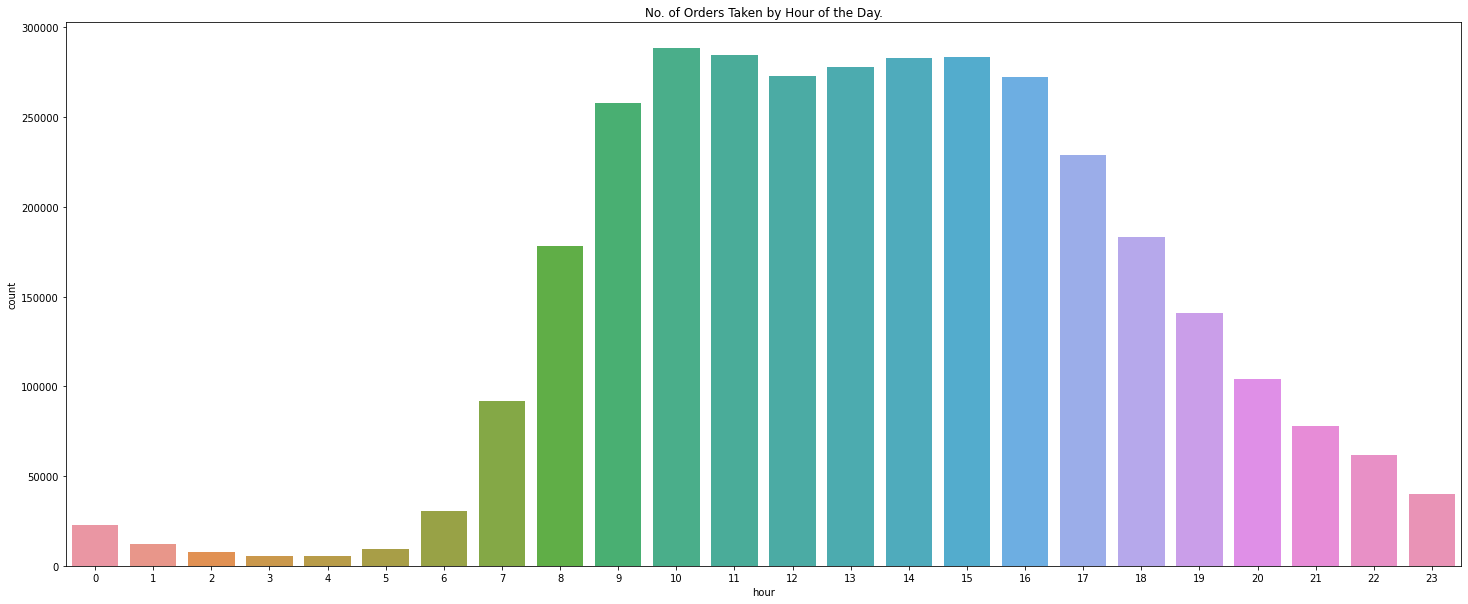

In [26]:
# ploting orders by hour
plt.figure(figsize = (25,10))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('No. of Orders Taken by Hour of the Day.')
plt.ylabel('count')
plt.xlabel('hour')
plt.savefig('images/orders_by_hour.png');

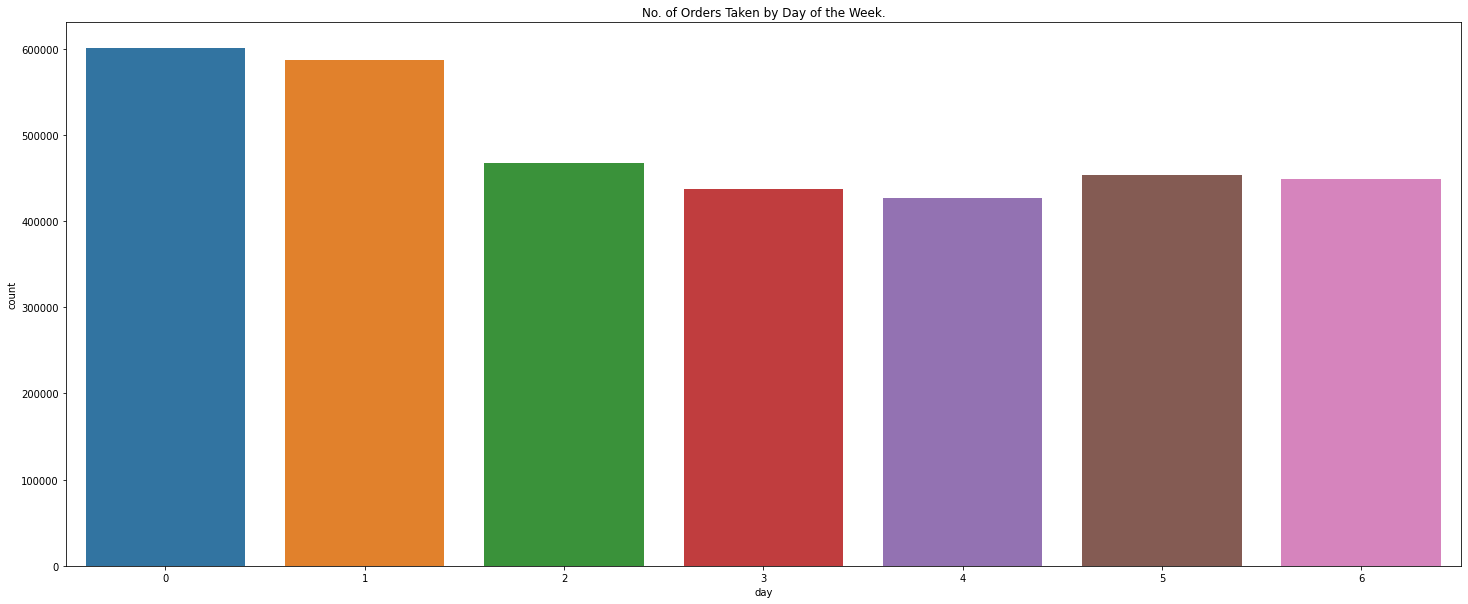

In [27]:
# order taken on day of week
plt.figure(figsize = (25,10))
sns.countplot(x='order_dow', data= orders)
plt.title('No. of Orders Taken by Day of the Week.')
plt.ylabel('count')
plt.xlabel('day')
plt.savefig('images/orders_by_day_of_week.png');
# we can see that on sunday there are more orders in the day of the week

In [28]:
orders.head(15)
# Appears to be sorted by user_id and then order_number
# Most recent order_number per user_id is in the train(or test) set, others in prior
# First order per user has 'NaN' in days_since_prior_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [29]:
orders.sort_values('order_id')
# checking the order_ids start from 1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


In [30]:
prior_data = orders[orders['eval_set'] == 'prior']
prior_data.size

22504118

In [31]:
orders_test = orders[orders['eval_set']=='test'] # checking how many test orders are there
orders_test
# here we don't know what user have ordered
# but we have prior orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


### Analyze Order_products_train and _prior

In [32]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [33]:
order_products_train.shape

(1384617, 4)

In [34]:
# min ,max and unique orders
print(order_products_train.order_id.min()) 
print(order_products_train.order_id.max())
print(order_products_train.order_id.nunique())

1
3421070
131209


In [35]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
order_products_prior.shape

(32434489, 4)

In [37]:
# min, max and unique orders
print(order_products_prior.order_id.min()) 
print(order_products_prior.order_id.max())
print(order_products_prior.order_id.nunique())

2
3421083
3214874


In [38]:
order_products_prior[order_products_prior.order_id == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [39]:
order_products_train[order_products_train.order_id == 1050357]

,order_id,product_id,add_to_cart_order,reordered
429686,1050357,33120,1,1
429687,1050357,1003,2,1
429688,1050357,21543,3,1
429689,1050357,20995,4,1
429690,1050357,46064,5,0
429691,1050357,20168,6,0
429692,1050357,42824,7,1
429693,1050357,4461,8,1
429694,1050357,45002,9,1
429695,1050357,8693,10,0


In [40]:
# So what do I know about this user...

len(orders[orders.user_id == 202279])

9

In [41]:
# which day they order usualy
orders[orders.user_id == 202279].order_dow.mode()

0    5
dtype: int64

In [42]:
# what is the average no. of days between orders
orders[orders.user_id == 202279].days_since_prior_order.mean()

22.625

In [43]:
# at what time they order
orders[orders.user_id == 202279].order_hour_of_day.mean()

11.666666666666666

In [44]:
# what are their orders
list(orders[orders.user_id == 202279]['order_id'].values)

[2894949, 1500071, 2, 3058248, 2808715, 132412, 2382766, 104690, 1050357]

In [45]:
# products they have ordered
order_products_prior[order_products_prior['order_id'].isin(list(orders[orders.user_id == 202279]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
28997578,3058248,27531,4,0
28997579,3058248,2944,5,0
28997580,3058248,38226,6,0
28997581,3058248,35106,7,0


# Data Preprocessing

#### Merge orders products together

In [46]:
print(order_products_train.shape)
print(order_products_prior.shape)

(1384617, 4)
(32434489, 4)


In [47]:
len(order_products_train) + len(order_products_prior)

33819106

In [48]:
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()

# to avoid overlapping i have used outer join

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [49]:
merged_order_products.shape

(33819106, 4)

In [50]:
# how many products per order are there
products_per_order = merged_order_products.groupby('order_id').count()

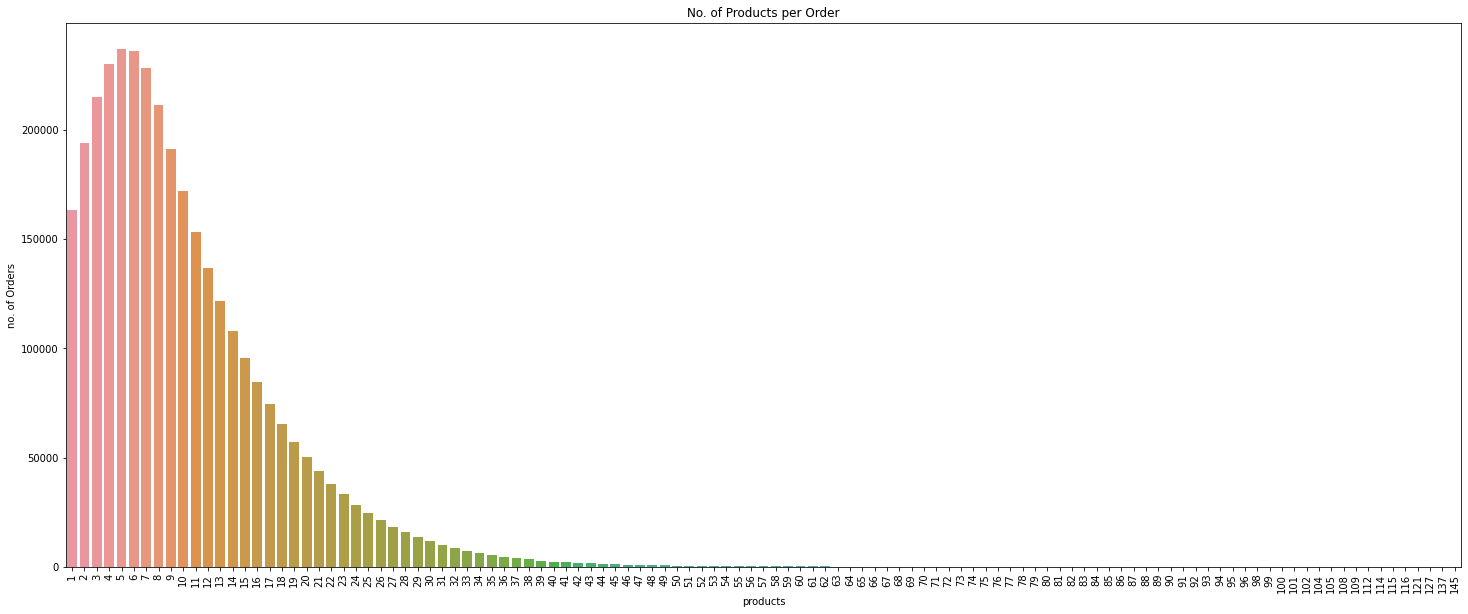

In [51]:
plt.figure(figsize = (25,10))
sns.countplot(x='product_id', data = products_per_order)
plt.title('No. of Products per Order')
plt.xticks(rotation=90)
plt.ylabel('no. of Orders')
plt.xlabel('products')
plt.savefig('images/product_count_by_order.png');

In [52]:
# this has an entry for each ordered product. 
# if we combine it with aisle and department we can see which products are ordered the most.
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [53]:
order_products_desc['product_name'].value_counts()

# banana is the most ordered food

Banana                             491291
Bag of Organic Bananas             394930
Organic Strawberries               275577
Organic Baby Spinach               251705
Organic Hass Avocado               220877
                                    ...  
Coconut Bliss Pineapple Coconut         1
Salsa, Black Bean                       1
Sweetart Jelly Beans                    1
The Ultimate Caramel Suace              1
Flatbread Pizza All Natural             1
Name: product_name, Length: 49685, dtype: int64

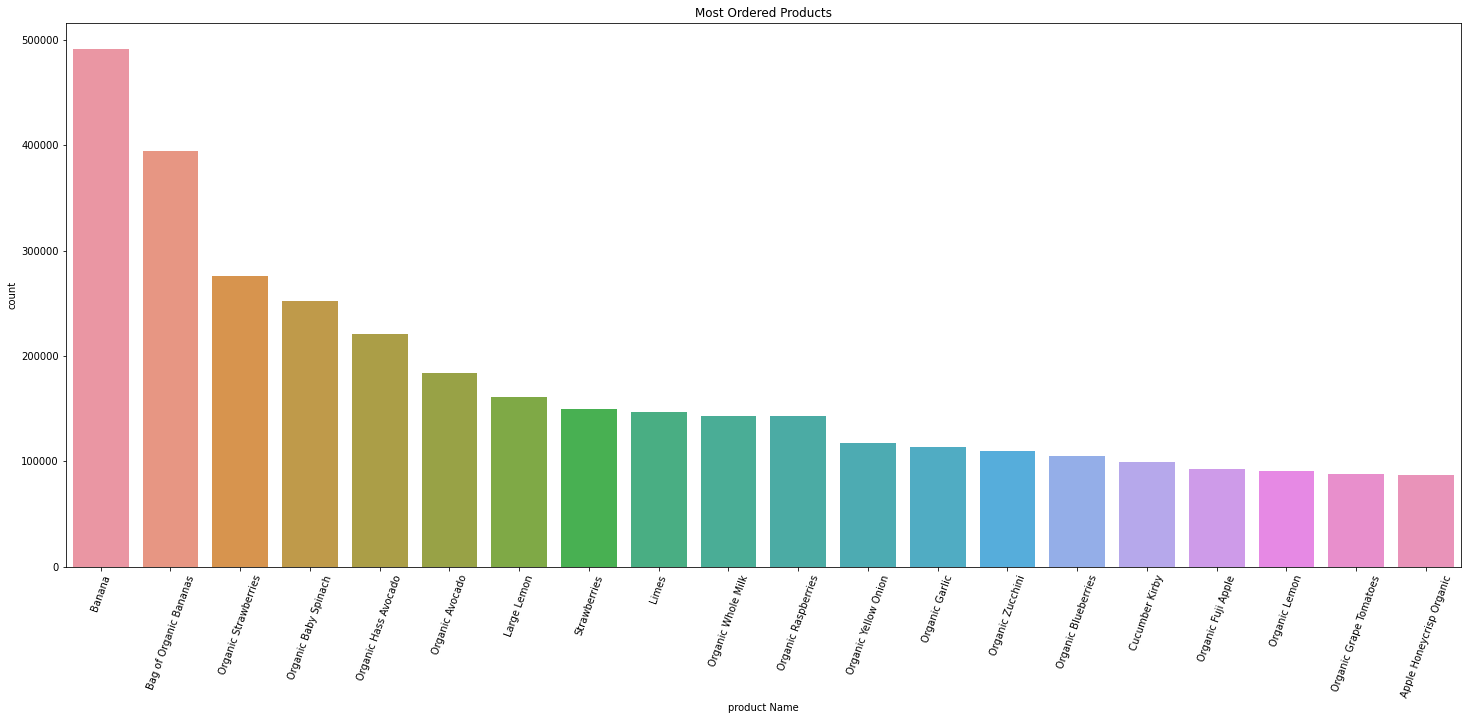

In [54]:
# let's visualize it
plt.figure(figsize = (25,10))
sns.countplot(x='product_name', data= order_products_desc, 
              order = order_products_desc.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('count')
plt.xlabel('product Name')
plt.savefig('images/ordered_products_by_name.png');

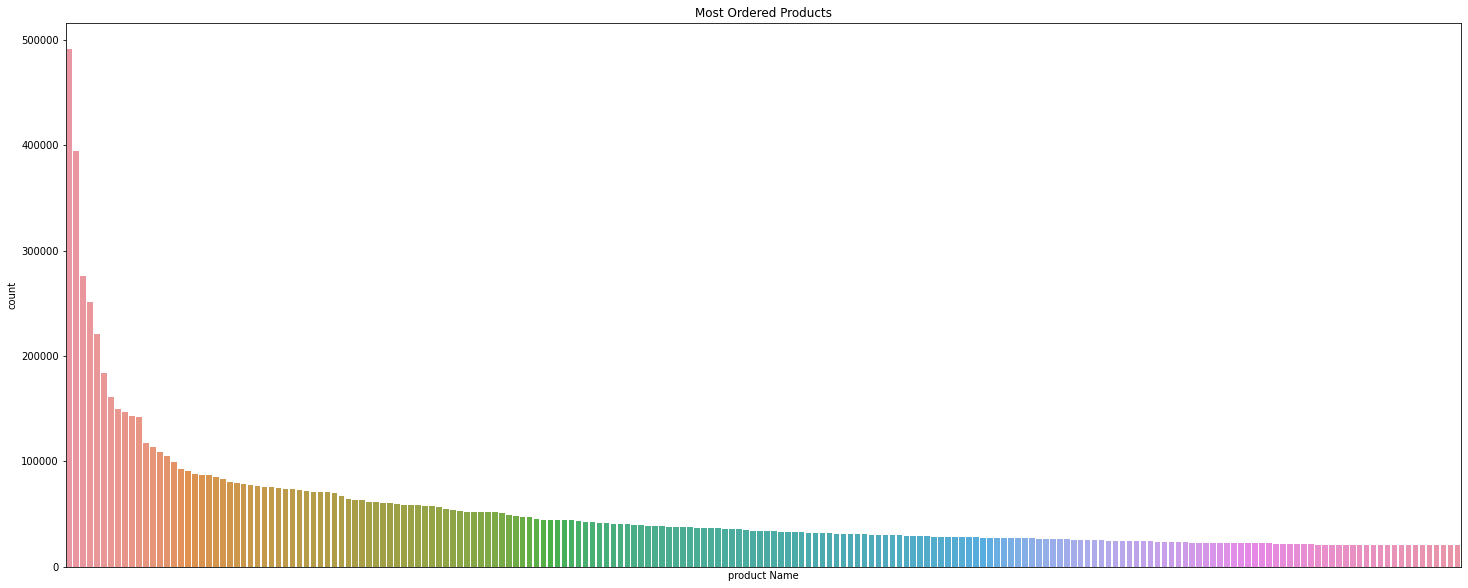

In [55]:
plt.figure(figsize = (25,10))
sns.countplot(x='product_name', data= order_products_desc, 
              order = order_products_desc.product_name.value_counts().index[:200])
plt.title('Most Ordered Products')
plt.xticks([])
plt.ylabel('count')
plt.xlabel('product Name')
plt.savefig('images/ordered_products_by_name_200.png');

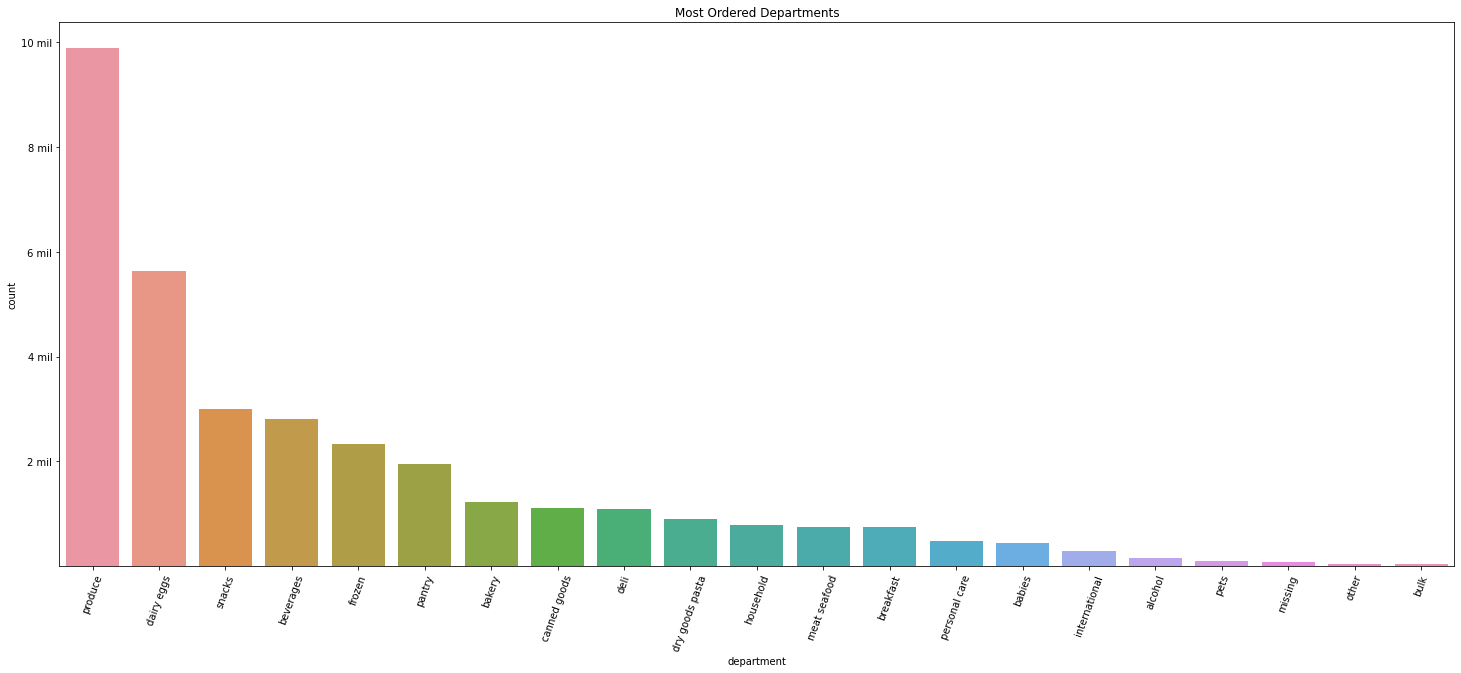

In [56]:
plt.figure(figsize = (25,10))
sns.countplot(x='department', data= order_products_desc, order = order_products_desc.department.value_counts().index)
plt.title('Most Ordered Departments')
plt.xticks(rotation=70)
plt.yticks([2000000,4000000,6000000,8000000,10000000],['2 mil','4 mil','6 mil','8 mil','10 mil'])
plt.ylabel('count')
plt.xlabel('department')
plt.savefig('images/ordered_products_by_department.png');

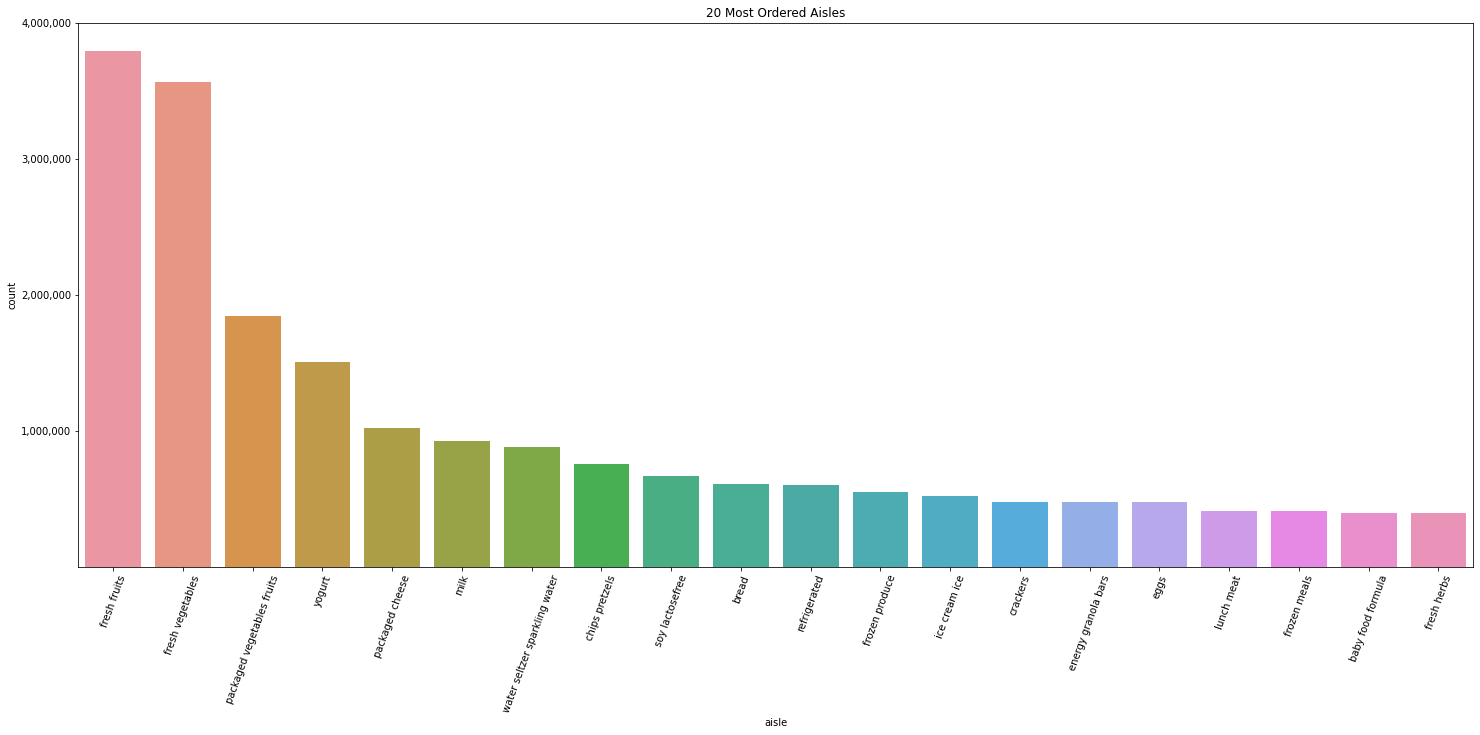

In [57]:
plt.figure(figsize = (25,10))
sns.countplot(x='aisle', data= order_products_desc, order = order_products_desc.aisle.value_counts().index[:20])
plt.title('20 Most Ordered Aisles')
plt.xticks(rotation=70)
plt.yticks([1000000,2000000,3000000,4000000],['1,000,000','2,000,000','3,000,000','4,000,000'])
plt.ylabel('count')
plt.xlabel('aisle')
plt.savefig('images/ordered_products_by_aisle.png');

#### Merge user orders

In [58]:
print(orders.shape)
print(order_products_desc.shape)


(3421083, 7)
(33819106, 9)


In [59]:
merged_orders = pd.merge(orders, order_products_desc[:len(orders)], on = 'order_id')
merged_orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
1,431534,1,prior,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,fresh fruits,produce
2,3108588,1,prior,8,1,14,14.0,49235,6,0,Organic Half & Half,53,16,cream,dairy eggs
3,2295261,1,prior,9,1,16,0.0,49235,1,1,Organic Half & Half,53,16,cream,dairy eggs
4,2550362,1,prior,10,4,8,30.0,35951,7,0,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs


In [60]:
len(merged_orders)

3421083

In [61]:
merged_orders[merged_orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
24,1374495,3,prior,1,1,14,NaN,39190,5,0,Vanilla Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
25,444309,3,prior,2,3,19,9.0,21137,7,0,Organic Strawberries,24,4,fresh fruits,produce
26,3002854,3,prior,3,3,16,21.0,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
27,3002854,3,prior,3,3,16,21.0,39190,1,1,Vanilla Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
28,2710558,3,prior,5,0,17,12.0,22035,8,0,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
29,2710558,3,prior,5,0,17,12.0,39190,1,1,Vanilla Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
30,1972919,3,prior,6,0,16,7.0,22035,1,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
31,1972919,3,prior,6,0,16,7.0,39190,2,1,Vanilla Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
32,1839752,3,prior,7,0,15,7.0,39190,1,1,Vanilla Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
33,3225766,3,prior,8,0,17,7.0,22035,2,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs


In [62]:
orders[orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [63]:
# test set of orders creation
test = orders[orders['eval_set']=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [64]:
merged_orders[merged_orders['user_id']==3]['product_name'].value_counts()

Vanilla Unsweetened Almond Milk    10
Organic Whole String Cheese         3
Organic Strawberries                1
Cucumber Kirby                      1
Name: product_name, dtype: int64

In [65]:
pickle.dump(merged_orders, open("pickle files/merged_orders.p", "wb"))

# Clustering

In [66]:
merged_orders = pickle.load(open("pickle files/merged_orders.p", "rb"))
merged_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
1,431534,1,prior,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,fresh fruits,produce
2,3108588,1,prior,8,1,14,14.0,49235,6,0,Organic Half & Half,53,16,cream,dairy eggs
3,2295261,1,prior,9,1,16,0.0,49235,1,1,Organic Half & Half,53,16,cream,dairy eggs
4,2550362,1,prior,10,4,8,30.0,35951,7,0,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs


In [67]:
user_info = merged_orders[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                           'days_since_prior_order', 'aisle']]

In [68]:
user_data = pd.get_dummies(user_info, prefix=None, columns=['aisle'])
user_data.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_baking ingredients,aisle_bread,aisle_butter,aisle_canned fruit applesauce,aisle_canned jarred vegetables,...,aisle_refrigerated,aisle_refrigerated pudding desserts,aisle_soap,aisle_soup broth bouillon,aisle_soy lactosefree,aisle_specialty cheeses,aisle_spreads,aisle_tortillas flat bread,aisle_water seltzer sparkling water,aisle_yogurt
0,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,4,15,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,1,14,14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,1,16,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,4,8,30.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
user_data['aisle_soap'].value_counts()

0    3418997
1       2086
Name: aisle_soap, dtype: int64

# Group By each User Id

In [70]:
 #Splitting the data in thirds to use groupby then will rejoin them
user_data1 = user_data[user_data['user_id'] <= 65000]
user_data2 = user_data[(user_data['user_id'] <= 135000) & (user_data['user_id'] > 65000)]
user_data3 = user_data[user_data['user_id'] > 135000]

In [71]:
grouped_user1 = user_data1.groupby('user_id').sum()
grouped_user2 = user_data2.groupby('user_id').sum()
grouped_user3 = user_data3.groupby('user_id').sum()

In [72]:
user_data1_noaisles = user_data1.iloc[:,:5]
user_data2_noaisles = user_data2.iloc[:,:5]
user_data3_noaisles = user_data3.iloc[:,:5]

In [73]:
group1 = user_data1_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group2 = user_data2_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group3 = user_data3_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})


In [74]:
# get number of orders for each user and add to grouped_user dfs
grouped_user1['num_orders'] = group1.order_number
grouped_user2['num_orders'] = group2.order_number
grouped_user3['num_orders'] = group3.order_number

In [75]:
grouped_user1['mean_days_since'] = group1.days_since_prior_order
grouped_user2['mean_days_since'] = group2.days_since_prior_order
grouped_user3['mean_days_since'] = group3.days_since_prior_order

In [76]:
grouped_user1['mode_order_dow'] = group1.order_dow
grouped_user2['mode_order_dow'] = group2.order_dow
grouped_user3['mode_order_dow'] = group3.order_dow

In [77]:
grouped_user1['median_order_hour'] = group1.order_hour_of_day
grouped_user2['median_order_hour'] = group2.order_hour_of_day
grouped_user3['median_order_hour'] = group3.order_hour_of_day

In [78]:
grouped_user1.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user2.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user3.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)

In [79]:
grouped_users = pd.concat([grouped_user1, grouped_user2, grouped_user3], axis=0)

In [80]:
grouped_users.head()

,aisle_baking ingredients,aisle_bread,aisle_butter,aisle_canned fruit applesauce,aisle_canned jarred vegetables,aisle_canned meals beans,aisle_canned meat seafood,aisle_chips pretzels,aisle_cold flu allergy,aisle_condiments,...,aisle_soy lactosefree,aisle_specialty cheeses,aisle_spreads,aisle_tortillas flat bread,aisle_water seltzer sparkling water,aisle_yogurt,num_orders,mean_days_since,mode_order_dow,median_order_hour
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,11,16.833333,4,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15,18.285714,2,10.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,12,11.428571,0,16.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,11.833333,0,17.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3,9.000000,5,18.0


In [81]:
# This function is from a Medium article by Adam Ross Nelson to rearrange columns in a df
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [82]:
grouped_users = movecol(grouped_users, 
             cols_to_move=['num_orders', 'mode_order_dow', 'median_order_hour', 'mean_days_since'], 
             ref_col='aisle_canned fruit applesauce',
             place='Before')
grouped_users.head()

,aisle_baking ingredients,aisle_bread,aisle_butter,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_canned fruit applesauce,aisle_canned jarred vegetables,aisle_canned meals beans,...,aisle_refrigerated,aisle_refrigerated pudding desserts,aisle_soap,aisle_soup broth bouillon,aisle_soy lactosefree,aisle_specialty cheeses,aisle_spreads,aisle_tortillas flat bread,aisle_water seltzer sparkling water,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,11,4,11.0,16.833333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,15,2,10.5,18.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,12,0,16.0,11.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5,0,17.0,11.833333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,3,5,18.0,9.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
pickle.dump(grouped_users, open("pickle files/grouped_users.p", "wb"))
grouped_users = pickle.load(open("pickle files/grouped_users.p", "rb"))